In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.gridspec as gridspec
import seaborn as sns

data = pd.read_csv('kc_house_price.txt')

In [ ]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [ ]:
data = data.drop(columns=['id', 'date','waterfront','view','sqft_basement','yr_renovated'])

In [ ]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,3,7,1020,2009,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,3,8,1600,2004,98027,47.5345,-122.069,1410,1287


In [ ]:

from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(data, test_size=0.3, random_state=25)

X_train = training_data.drop('price', axis = 1)
y_train = training_data['price']

X_test = testing_data.drop('price', axis = 1)
y_test = testing_data['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

lm = RandomForestRegressor() 

lm.fit(X_train,y_train) 
y_pred = lm.predict(X_test)


In [ ]:
test_df = pd.DataFrame({
    "Y_test": y_test,
    "Y_predict": y_pred
})
print(test_df)

         Y_test      Y_predict
3990   425000.0  462898.730000
16939  284000.0  274636.030000
9533   734000.0  682417.860000
6473   525000.0  497382.200000
15787  310000.0  441864.000000
...         ...            ...
19532  359900.0  313412.810000
7254   175000.0  196106.666667
37     640000.0  803703.550000
10915  525888.0  444493.000000
17324  815000.0  683870.060000

[6480 rows x 2 columns]


In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
print('r_score:', r2_score(y_test, y_pred))

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

r_score: 0.8548628356592242
MSE: 19016771920.062504


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


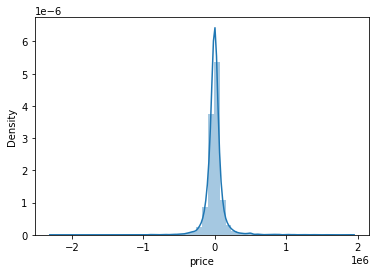

In [ ]:
sns.distplot((y_test-y_pred),bins=50); 

In [ ]:
lm.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1325016958),
 DecisionTreeRegressor(max_features='auto', random_state=1173961574),
 DecisionTreeRegressor(max_features='auto', random_state=204782897),
 DecisionTreeRegressor(max_features='auto', random_state=1898457034),
 DecisionTreeRegressor(max_features='auto', random_state=255896400),
 DecisionTreeRegressor(max_features='auto', random_state=1680026025),
 DecisionTreeRegressor(max_features='auto', random_state=732436471),
 DecisionTreeRegressor(max_features='auto', random_state=1519925242),
 DecisionTreeRegressor(max_features='auto', random_state=127031612),
 DecisionTreeRegressor(max_features='auto', random_state=1204053913),
 DecisionTreeRegressor(max_features='auto', random_state=1304731625),
 DecisionTreeRegressor(max_features='auto', random_state=1139289266),
 DecisionTreeRegressor(max_features='auto', random_state=450933603),
 DecisionTreeRegressor(max_features='auto', random_state=1618587224),
 DecisionTreeRegressor(ma

In [ ]:
len(lm.estimators_)

100

[Text(0.6613922087471225, 0.9852941176470589, 'X[6] <= 8.5\nsquared_error = 136309820926.878\nsamples = 9517\nvalue = 544184.41'),
 Text(0.40781651667394636, 0.9558823529411765, 'X[10] <= 47.533\nsquared_error = 38158054787.037\nsamples = 7625\nvalue = 437010.236'),
 Text(0.19447500972993076, 0.9264705882352942, 'X[2] <= 2062.0\nsquared_error = 14217236834.524\nsamples = 3180\nvalue = 316000.413'),
 Text(0.10820718306840944, 0.8970588235294118, 'X[2] <= 1535.0\nsquared_error = 6838101547.815\nsamples = 2184\nvalue = 273344.921'),
 Text(0.03437414784528962, 0.8676470588235294, 'X[11] <= -122.378\nsquared_error = 5550884198.739\nsamples = 1153\nvalue = 245392.67'),
 Text(0.0029701362085901906, 0.8382352941176471, 'X[10] <= 47.513\nsquared_error = 8602428666.416\nsamples = 45\nvalue = 362904.972'),
 Text(0.0011000504476259966, 0.8088235294117647, 'X[8] <= 1999.0\nsquared_error = 5025573331.634\nsamples = 26\nvalue = 322294.605'),
 Text(0.0009900454028633969, 0.7794117647058824, 'X[10] <= 

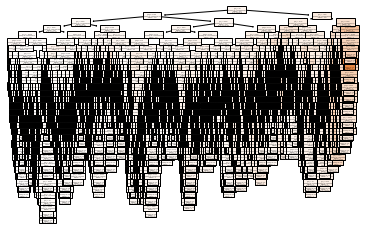

In [ ]:
from sklearn import tree
_ = tree.plot_tree(lm.estimators_[0] , filled =True)